In [1]:
#checking the function to interpolate (5sg-2)ng

In [1]:
%matplotlib inline

from __future__ import division
import os
import sys
from scipy import integrate, optimize

from scipy.interpolate import interp2d, interp1d

import numpy as np
from numpy import pi,sin,cos,tan,e,arctan,arcsin,arccos,sqrt
from numpy.random import randn
import matplotlib
import matplotlib.pyplot as P
from time import clock



from mpl_toolkits.mplot3d import axes3d
matplotlib.rcParams['figure.figsize'] = (9, 6)
P.rcParams['text.usetex'] = True  # not really needed
P.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
P.rcParams["font.size"] = 24
P.rc('xtick', labelsize=20) 
P.rc('ytick', labelsize=20)
# P.rc('xtick', labelsize=20) 
# P.rc('ytick', labelsize=20)
np.set_printoptions(threshold=np.nan)


from magmod import sg5minus2, dndz_fit, sgng_interp, dndz_norm, nofz


sigma_8_BBKS = 0.833959881058

#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$ 
Rescaling the galaxy number density by a factor of 103811.592208 to match the gold sample with 6330073646.61 total galaxies 
#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$ 



In [4]:



ztab = np.linspace(0.0005,2., 100)
mtab = np.linspace(19,27,50)

magmesh, zmesh = np.meshgrid(mtab, ztab)
print magmesh.shape, zmesh.shape

truemesh = np.zeros(zmesh.shape)
interp_sgngmesh = np.zeros(zmesh.shape)

truenorm = np.zeros(mtab.shape)
fit_norm = np.zeros(mtab.shape)

print truemesh.shape, interp_sgngmesh.shape, 

(200, 50) (200, 50)
(200, 50) (200, 50)


In [ ]:

for i in range(len(ztab)):
    for j in range(len(mtab)):
        zz = ztab[i]
        mm = mtab[j]
#         n = dndz_fit(zz,mm)
        n = nofz(zz,mm)
        sg5m2 = sg5minus2(zz,mm)
        truemesh[i,j] = sg5m2*n
        interp_sgngmesh[i,j] = sgng_interp(zz,mm)
        
zmin = 0.5
zmax = 1.5
for j in range(len(mtab)):
    mm = mtab[j]
    truenorm[j] = dndz_norm(zmin, zmax, mm, FIT = False)
    fit_norm[j] = dndz_norm(zmin, zmax, mm, FIT = True)

Using non default rmax = 19.0 for experiment
Using non default rmax = 19.1632653061 for experiment
Using non default rmax = 19.3265306122 for experiment
Using non default rmax = 19.4897959184 for experiment
Using non default rmax = 19.6530612245 for experiment
Using non default rmax = 19.8163265306 for experiment
Using non default rmax = 19.9795918367 for experiment
Using non default rmax = 20.1428571429 for experiment
Using non default rmax = 20.306122449 for experiment
Using non default rmax = 20.4693877551 for experiment
Using non default rmax = 20.6326530612 for experiment
Using non default rmax = 20.7959183673 for experiment
Using non default rmax = 20.9591836735 for experiment
Using non default rmax = 21.1224489796 for experiment
Using non default rmax = 21.2857142857 for experiment
Using non default rmax = 21.4489795918 for experiment
Using non default rmax = 21.612244898 for experiment
Using non default rmax = 21.7755102041 for experiment
Using non default rmax = 21.9387755102 

Using non default rmax = 19.9795918367 for experiment
Using non default rmax = 20.1428571429 for experiment
Using non default rmax = 20.306122449 for experiment
Using non default rmax = 20.4693877551 for experiment
Using non default rmax = 20.6326530612 for experiment
Using non default rmax = 20.7959183673 for experiment
Using non default rmax = 20.9591836735 for experiment
Using non default rmax = 21.1224489796 for experiment
Using non default rmax = 21.2857142857 for experiment
Using non default rmax = 21.4489795918 for experiment
Using non default rmax = 21.612244898 for experiment
Using non default rmax = 21.7755102041 for experiment
Using non default rmax = 21.9387755102 for experiment
Using non default rmax = 22.1020408163 for experiment
Using non default rmax = 22.2653061224 for experiment
Using non default rmax = 22.4285714286 for experiment
Using non default rmax = 22.5918367347 for experiment
Using non default rmax = 22.7551020408 for experiment
Using non default rmax = 22.91

Using non default rmax = 20.4693877551 for experiment
Using non default rmax = 20.6326530612 for experiment
Using non default rmax = 20.7959183673 for experiment
Using non default rmax = 20.9591836735 for experiment
Using non default rmax = 21.1224489796 for experiment
Using non default rmax = 21.2857142857 for experiment
Using non default rmax = 21.4489795918 for experiment
Using non default rmax = 21.612244898 for experiment
Using non default rmax = 21.7755102041 for experiment
Using non default rmax = 21.9387755102 for experiment
Using non default rmax = 22.1020408163 for experiment
Using non default rmax = 22.2653061224 for experiment
Using non default rmax = 22.4285714286 for experiment
Using non default rmax = 22.5918367347 for experiment
Using non default rmax = 22.7551020408 for experiment
Using non default rmax = 22.9183673469 for experiment
Using non default rmax = 23.0816326531 for experiment
Using non default rmax = 23.2448979592 for experiment
Using non default rmax = 23.4

In [ ]:
# plotting the percent level difference in 

fig = P.figure(figsize = (9,9)); ax = fig.add_subplot(111, projection = '3d');

ax.plot_wireframe(zmesh, magmesh, (truemesh-interp_sgngmesh)/truemesh*100, rstride=10, cstride=10, color = 'red')
# ax.plot_wireframe(zmesh, magmesh, interp_sgngmesh, rstride=1, cstride=1, color = 'black')

ax.set_xlabel("z")
ax.set_ylabel("m")
ax.set_zlabel("diff \%")

ax.view_init(15, -70)


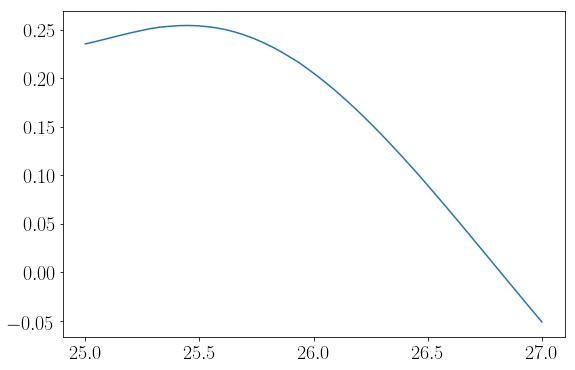

In [12]:
#checking the normalization of nofz

fig = P.figure(); ax =fig.add_subplot(111);
ax.plot(mtab, (truenorm-fit_norm)/truenorm*100)
